# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

   https://www.kaggle.com/datasets/anthonytherrien/depression-dataset/data
   

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [28]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [29]:
df = pd.read_csv('dataset/depression_data.csv')
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [30]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [31]:
df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [32]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Name: 196851
Age: 63
Marital Status: 4
Education Level: 5
Number of Children: 5
Smoking Status: 3
Physical Activity Level: 3
Employment Status: 2
Income: 405282
Alcohol Consumption: 3
Dietary Habits: 3
Sleep Patterns: 3
History of Mental Illness: 2
History of Substance Abuse: 2
Family History of Depression: 2
Chronic Medical Conditions: 2


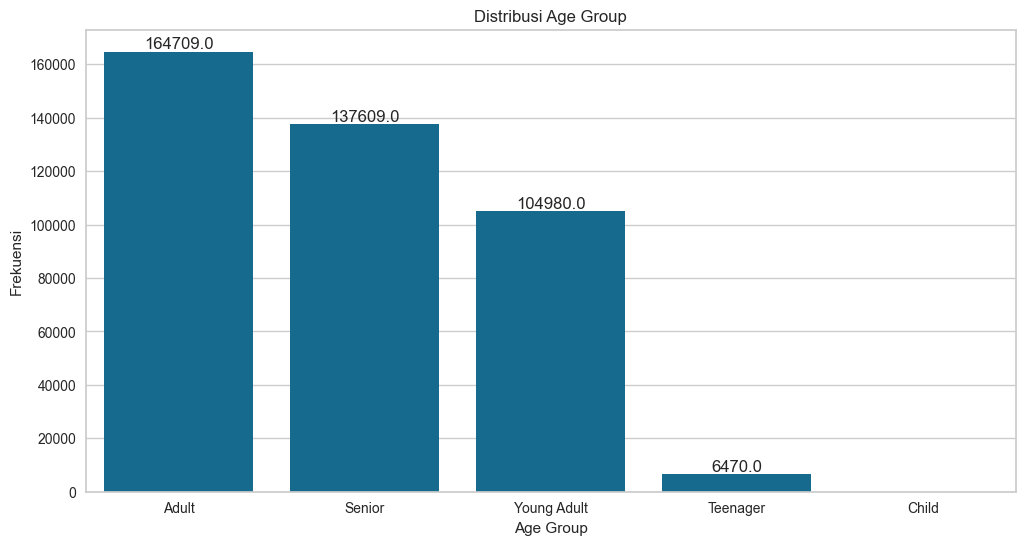

In [33]:
# Menghitung distribusi Umur dan menampilkan bar chart untuk visualisasi
bins = [0, 12, 19, 35, 60, 100] 
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Visualisasi countplot untuk kelompok umur (Age_Group)
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Age_Group', data=df, order=df['Age_Group'].value_counts().index)

# Menambahkan label jumlah orang di atas setiap bar
for p in ax.patches:
    height = p.get_height()  # Tinggi bar
    ax.text(p.get_x() + p.get_width() / 2, height + 5,  # Posisi label
            f'{height}',  # Menampilkan jumlah orang
            ha='center', va='bottom', fontsize=12)

plt.title('Distribusi Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frekuensi')
plt.show()

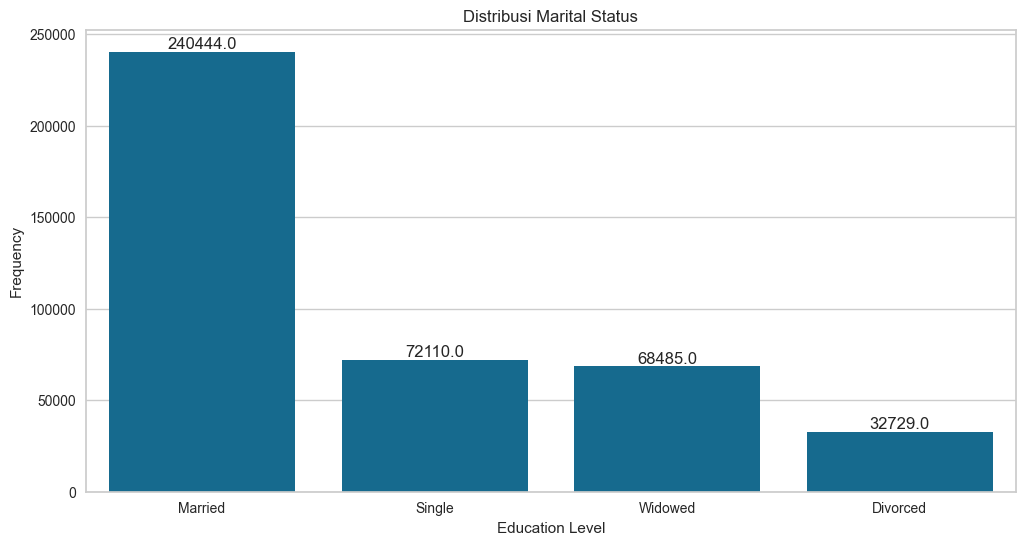

In [34]:
# Menghitung distribusi Marital Status dan menampilkan bar chart untuk visualisasi
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Marital Status', data=df, order=df['Marital Status'].value_counts().index)

# Menambahkan label jumlah orang di atas setiap bar
for p in ax.patches:
    height = p.get_height()  # Tinggi bar
    ax.text(p.get_x() + p.get_width() / 2, height + 5,  # Posisi label
            f'{height}',  # Menampilkan jumlah orang
            ha='center', va='bottom', fontsize=12)

plt.title('Distribusi Marital Status')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

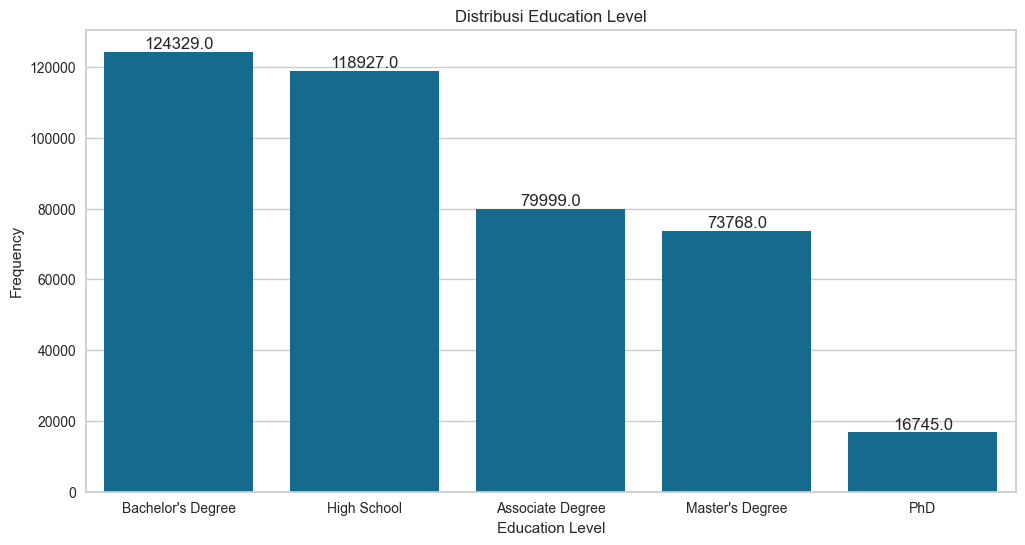

In [35]:
# Menghitung distribusi Education Level dan menampilkan bar chart untuk visualisasi
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Education Level', data=df, order=df['Education Level'].value_counts().index)

# Menambahkan label jumlah orang di atas setiap bar
for p in ax.patches:
    height = p.get_height()  # Tinggi bar
    ax.text(p.get_x() + p.get_width() / 2, height + 5,  # Posisi label
            f'{height}',  # Menampilkan jumlah orang
            ha='center', va='bottom', fontsize=12)

plt.title('Distribusi Education Level')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

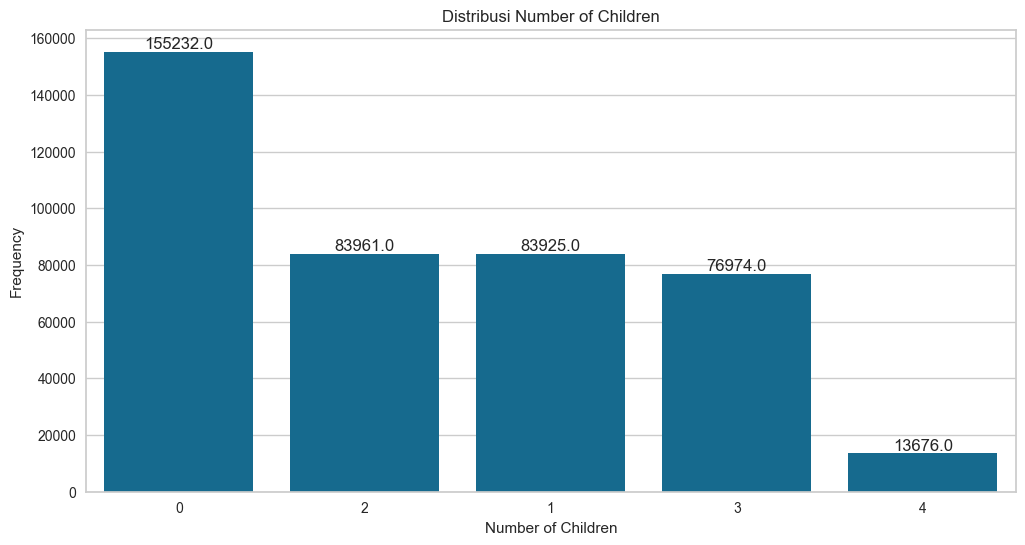

In [36]:
# Menghitung distribusi Number of Children dan menampilkan bar chart untuk visualisasi
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Number of Children', data=df, order=df['Number of Children'].value_counts().index)

# Menambahkan label jumlah orang di atas setiap bar
for p in ax.patches:
    height = p.get_height()  # Tinggi bar
    ax.text(p.get_x() + p.get_width() / 2, height + 5,  # Posisi label
            f'{height}',  # Menampilkan jumlah orang
            ha='center', va='bottom', fontsize=12)

plt.title('Distribusi Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

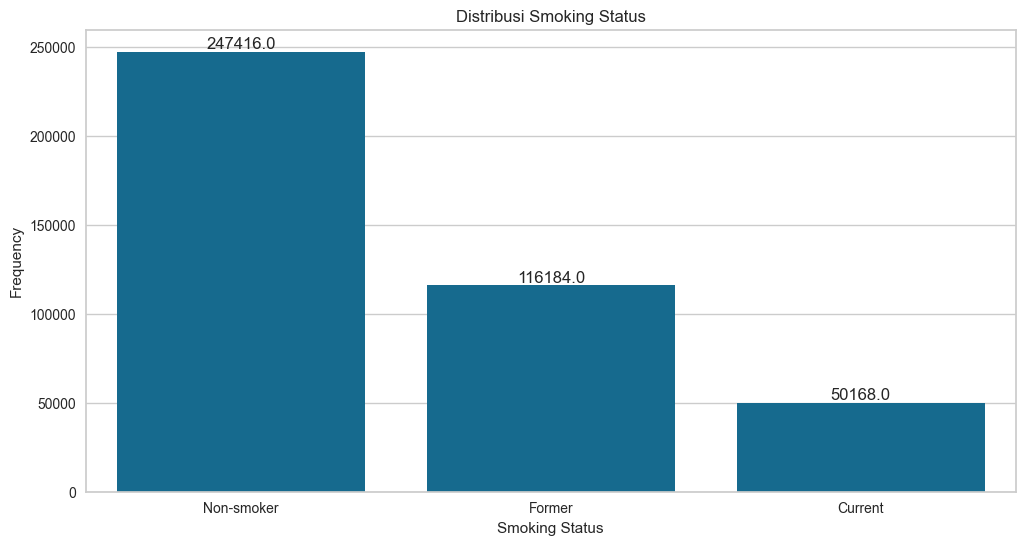

In [37]:
# Menghitung distribusi Smoking Status dan menampilkan bar chart untuk visualisasi
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Smoking Status', data=df, order=df['Smoking Status'].value_counts().index)

# Menambahkan label jumlah orang di atas setiap bar
for p in ax.patches:
    height = p.get_height()  # Tinggi bar
    ax.text(p.get_x() + p.get_width() / 2, height + 5,  # Posisi label
            f'{height}',  # Menampilkan jumlah orang
            ha='center', va='bottom', fontsize=12)

plt.title('Distribusi Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Frequency')
plt.show()

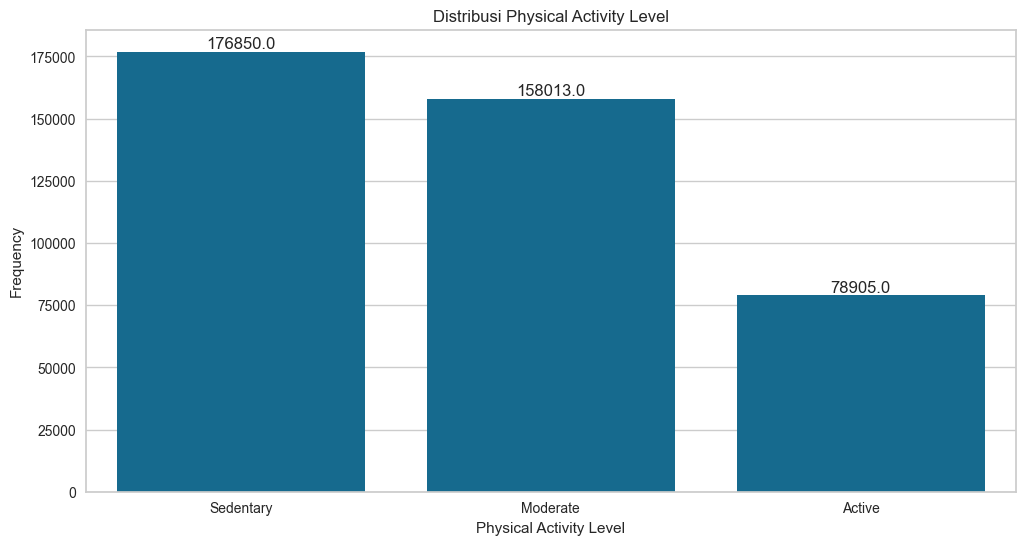

In [38]:
# Menghitung distribusi Physical Activity Level dan menampilkan bar chart untuk visualisasi
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Physical Activity Level', data=df, order=df['Physical Activity Level'].value_counts().index)

# Menambahkan label jumlah orang di atas setiap bar
for p in ax.patches:
    height = p.get_height()  # Tinggi bar
    ax.text(p.get_x() + p.get_width() / 2, height + 5,  # Posisi label
            f'{height}',  # Menampilkan jumlah orang
            ha='center', va='bottom', fontsize=12)

plt.title('Distribusi Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

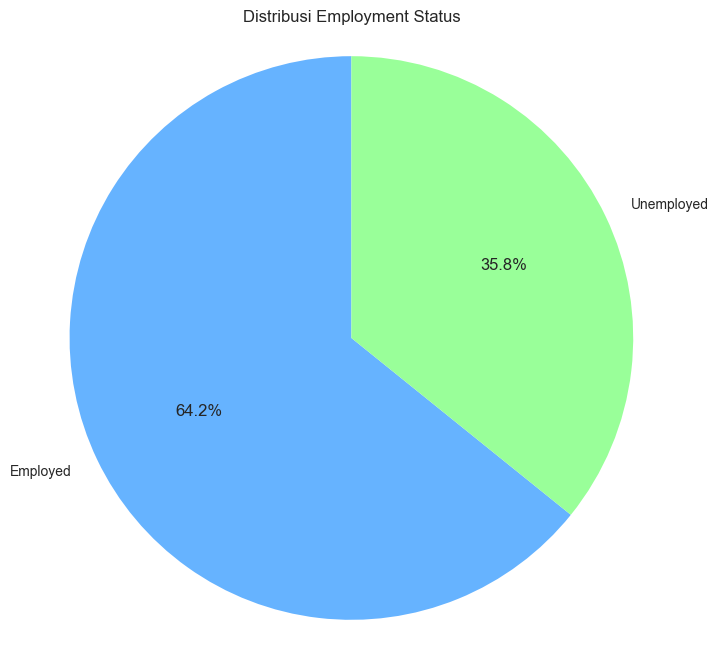

In [39]:
# Menghitung distribusi Employment Status Level dan menampilkan bar chart untuk visualisasi
employment_status_distribution = df['Employment Status'].value_counts()

# Tentukan label dan warna untuk pie chart
labels = employment_status_distribution.index
colors = ['#66b3ff', '#99ff99']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(employment_status_distribution, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Distribusi Employment Status")
plt.axis('equal')  
plt.show()

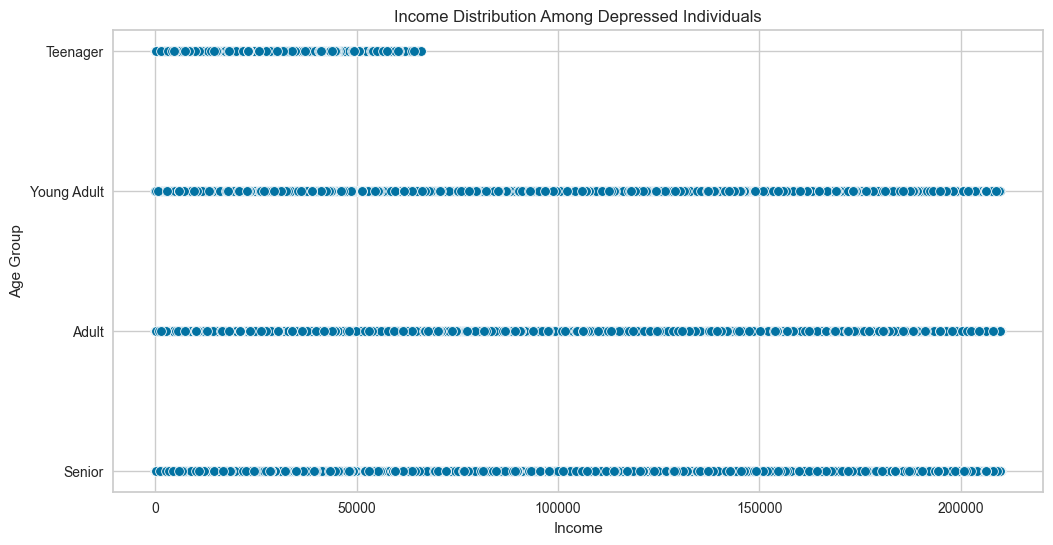

In [40]:
# Menghitung distribusi Income dan menampilkan bar chart untuk visualisasi
plt.figure(figsize=(12, 6)) 
sns.scatterplot(x='Income', y='Age_Group', data=df) 
plt.title('Income Distribution Among Depressed Individuals') 
plt.xlabel('Income') 
plt.ylabel('Age Group')
plt.show()

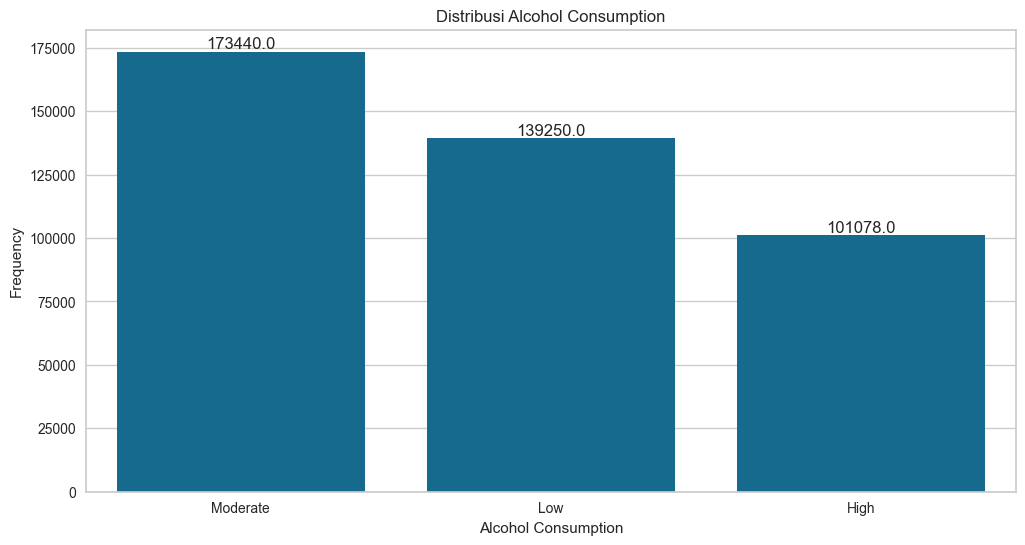

In [41]:
# Menghitung distribusi Alcohol Consumption dan menampilkan bar chart untuk visualisasi
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Alcohol Consumption', data=df, order=df['Alcohol Consumption'].value_counts().index)

# Menambahkan label jumlah orang di atas setiap bar
for p in ax.patches:
    height = p.get_height()  # Tinggi bar
    ax.text(p.get_x() + p.get_width() / 2, height + 5,  # Posisi label
            f'{height}',  # Menampilkan jumlah orang
            ha='center', va='bottom', fontsize=12)

plt.title('Distribusi Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Frequency')
plt.show()

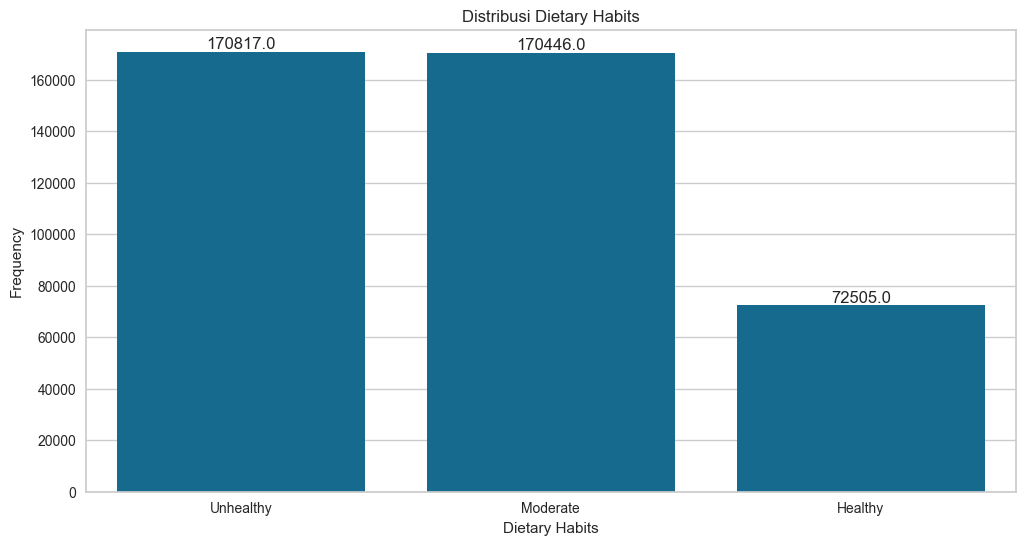

In [42]:
# Menghitung distribusi Dietary Habits dan menampilkan bar chart untuk visualisasi
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Dietary Habits', data=df, order=df['Dietary Habits'].value_counts().index)

# Menambahkan label jumlah orang di atas setiap bar
for p in ax.patches:
    height = p.get_height()  # Tinggi bar
    ax.text(p.get_x() + p.get_width() / 2, height + 5,  # Posisi label
            f'{height}',  # Menampilkan jumlah orang
            ha='center', va='bottom', fontsize=12)

plt.title('Distribusi Dietary Habits')
plt.xlabel('Dietary Habits')
plt.ylabel('Frequency')
plt.show()

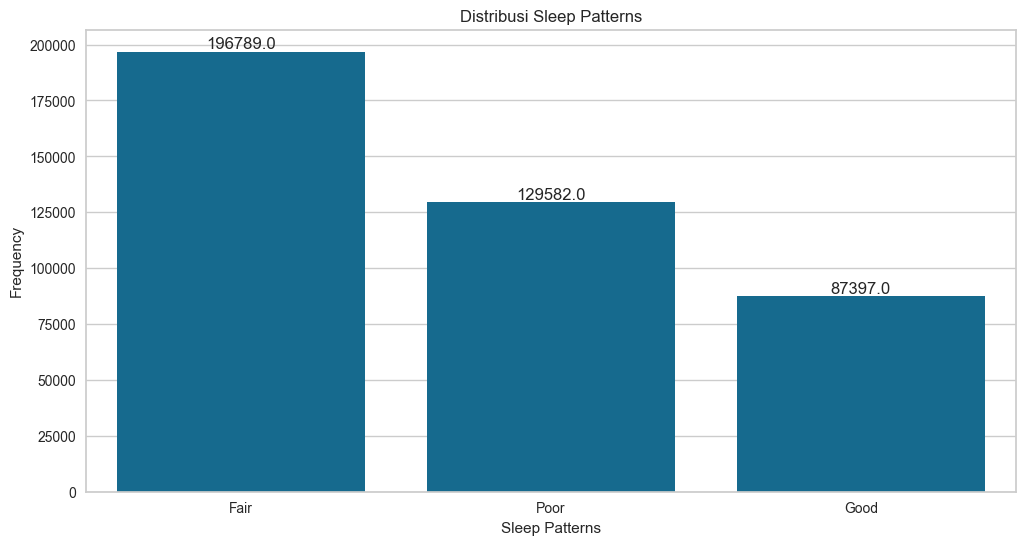

In [43]:
# Menghitung distribusi Sleep Patterns dan menampilkan bar chart untuk visualisasi
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Sleep Patterns', data=df, order=df['Sleep Patterns'].value_counts().index)

# Menambahkan label jumlah orang di atas setiap bar
for p in ax.patches:
    height = p.get_height()  # Tinggi bar
    ax.text(p.get_x() + p.get_width() / 2, height + 5,  # Posisi label
            f'{height}',  # Menampilkan jumlah orang
            ha='center', va='bottom', fontsize=12)

plt.title('Distribusi Sleep Patterns')
plt.xlabel('Sleep Patterns')
plt.ylabel('Frequency')
plt.show()

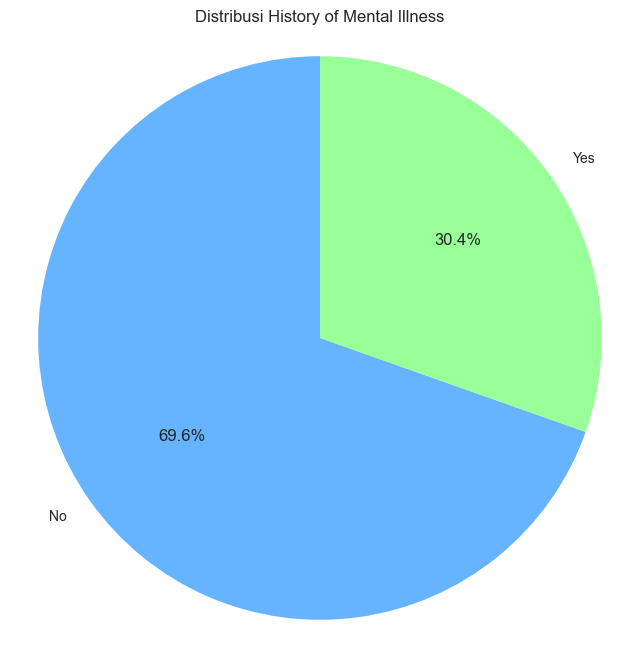

In [44]:
# Menghitung distribusi History of Mental Illness dan menampilkan bar chart untuk visualisasi
employment_status_distribution = df['History of Mental Illness'].value_counts()

# Tentukan label dan warna untuk pie chart
labels = employment_status_distribution.index
colors = ['#66b3ff', '#99ff99']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(employment_status_distribution, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Distribusi History of Mental Illness")
plt.axis('equal')  
plt.show()

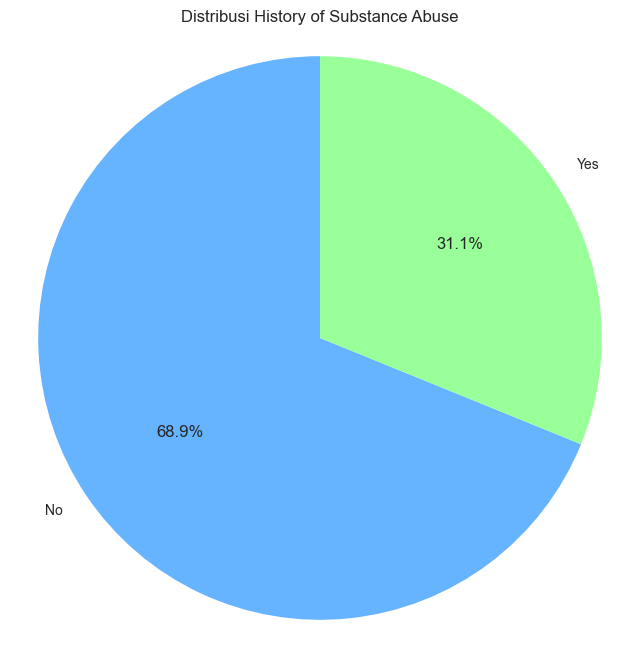

In [45]:
# Menghitung distribusi History of Substance Abuse dan menampilkan bar chart untuk visualisasi
employment_status_distribution = df['History of Substance Abuse'].value_counts()

# Tentukan label dan warna untuk pie chart
labels = employment_status_distribution.index
colors = ['#66b3ff', '#99ff99']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(employment_status_distribution, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Distribusi History of Substance Abuse")
plt.axis('equal')  
plt.show()

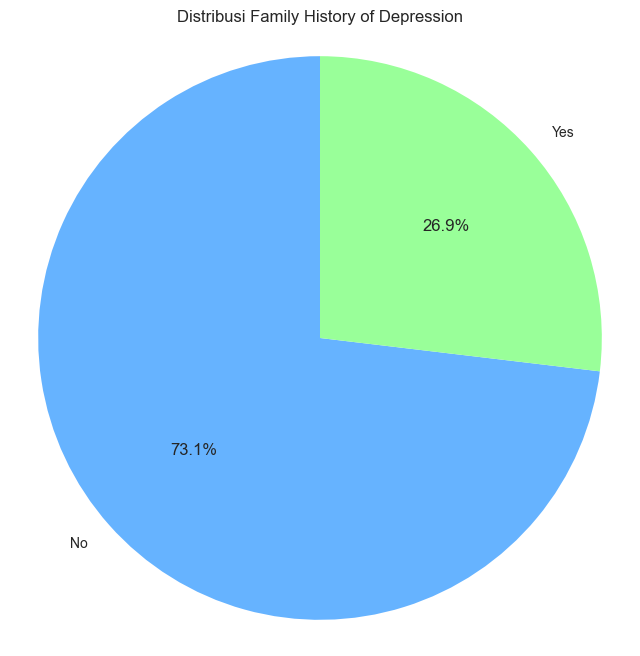

In [46]:
# Menghitung distribusi Family History of Depression dan menampilkan bar chart untuk visualisasi
employment_status_distribution = df['Family History of Depression'].value_counts()

# Tentukan label dan warna untuk pie chart
labels = employment_status_distribution.index
colors = ['#66b3ff', '#99ff99']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(employment_status_distribution, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Distribusi Family History of Depression")
plt.axis('equal')  
plt.show()

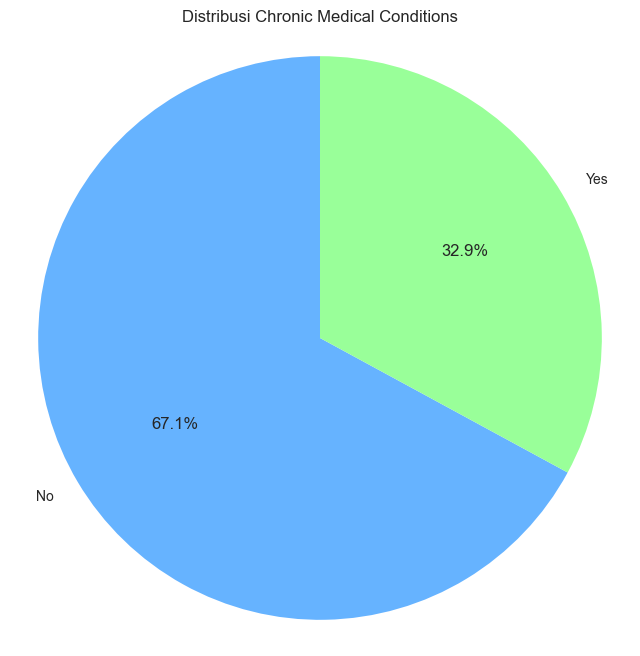

In [47]:
# Menghitung distribusi Family History of Depression dan menampilkan bar chart untuk visualisasi
employment_status_distribution = df['Chronic Medical Conditions'].value_counts()

# Tentukan label dan warna untuk pie chart
labels = employment_status_distribution.index
colors = ['#66b3ff', '#99ff99']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(employment_status_distribution, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Distribusi Chronic Medical Conditions")
plt.axis('equal')  
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Name                          413768 non-null  object  
 1   Age                           413768 non-null  int64   
 2   Marital Status                413768 non-null  object  
 3   Education Level               413768 non-null  object  
 4   Number of Children            413768 non-null  int64   
 5   Smoking Status                413768 non-null  object  
 6   Physical Activity Level       413768 non-null  object  
 7   Employment Status             413768 non-null  object  
 8   Income                        413768 non-null  float64 
 9   Alcohol Consumption           413768 non-null  object  
 10  Dietary Habits                413768 non-null  object  
 11  Sleep Patterns                413768 non-null  object  
 12  History of Mental Illness     

In [49]:
df.drop(columns='Name',inplace = True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Age                           413768 non-null  int64   
 1   Marital Status                413768 non-null  object  
 2   Education Level               413768 non-null  object  
 3   Number of Children            413768 non-null  int64   
 4   Smoking Status                413768 non-null  object  
 5   Physical Activity Level       413768 non-null  object  
 6   Employment Status             413768 non-null  object  
 7   Income                        413768 non-null  float64 
 8   Alcohol Consumption           413768 non-null  object  
 9   Dietary Habits                413768 non-null  object  
 10  Sleep Patterns                413768 non-null  object  
 11  History of Mental Illness     413768 non-null  object  
 12  History of Substance Abuse    

In [51]:
# Mengambil kolom 'Income' dan 'Education Level' dari dataset dan menyimpannya dalam array X
X = df.iloc[:, [7, 0]].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['Income', 'Age']))

           Income   Age
0        26265.67  31.0
1        42710.36  55.0
2       125332.79  78.0
3         9992.78  58.0
4         8595.08  18.0
...           ...   ...
413763  109233.43  68.0
413764   96760.97  26.0
413765   77353.26  57.0
413766   24557.08  71.0
413767  107125.74  62.0

[413768 rows x 2 columns]


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

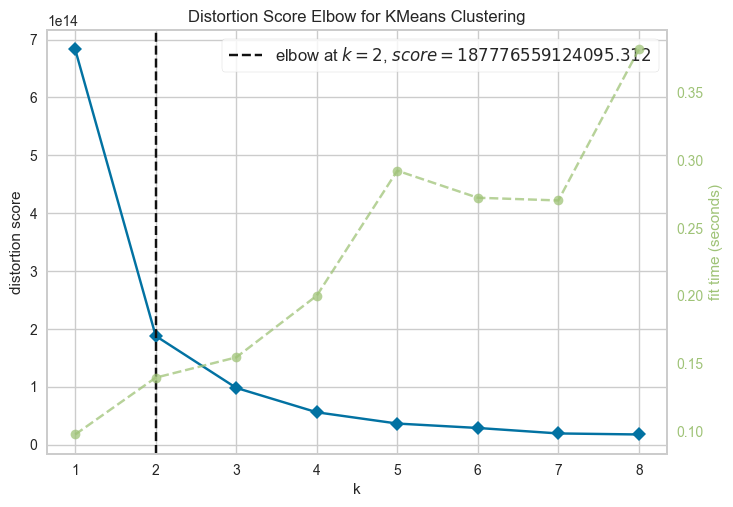

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
# Inisialisasi model KMeans
kmeans = KMeans()

# Gunakan KElbowVisualizer untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 9))

# Fit visualizer dengan data
visualizer.fit(X)

# Menampilkan grafik elbow
visualizer.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [53]:
# Setelah jumlah cluster optimal ditemukan (misalnya 4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]
        
        # Validasi ukuran cluster
        if len(cluster_data) == 0:
            print(f"Cluster {cluster_id + 1} tidak memiliki data.")
            continue

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_income = cluster_data[:, 0].mean()  # Rata-rata Income
        mean_el = cluster_data[:, 1].mean()  # Rata-rata Education Level

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Income : {mean_income:.2f}")
        print(f"Rata-rata Age: {mean_el:.2f}")

# Analisis karakteristik cluster
analyze_clusters(X, labels, k)


Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Income : 17615.74
Rata-rata Age: 51.90

Cluster 2:
Rata-rata Income : 92321.32
Rata-rata Age: 47.37

Cluster 3:
Rata-rata Income : 145411.32
Rata-rata Age: 50.42

Cluster 4:
Rata-rata Income : 48634.67
Rata-rata Age: 45.13


In [57]:
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"\nSilhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.57


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [58]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

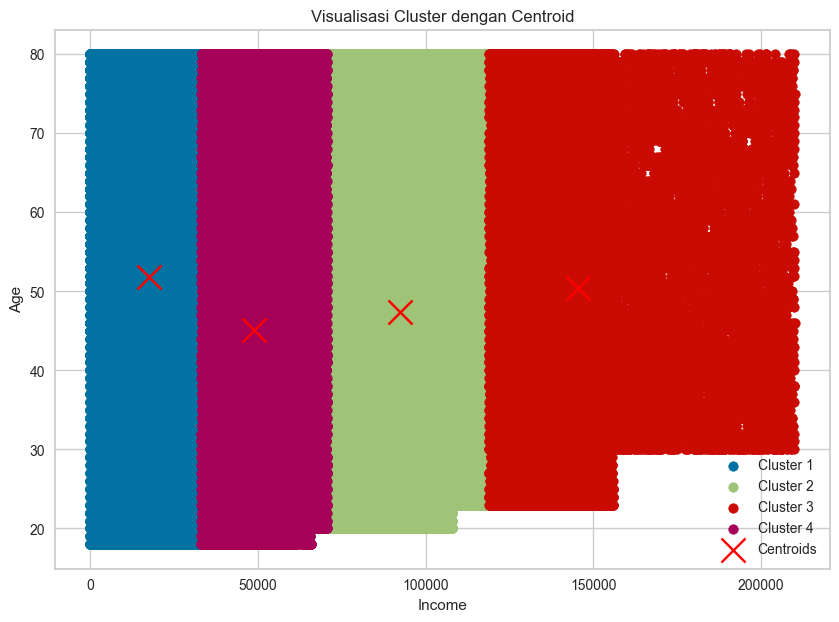

Nilai Centroids:
Centroid 1: Income = 17673.19, Age = 51.86
Centroid 2: Income = 92409.00, Age = 47.38
Centroid 3: Income = 145480.80, Age = 50.42
Centroid 4: Income = 48767.90, Age = 45.14


In [59]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 7))

# Loop untuk setiap cluster
for cluster_id in range(k):
    plt.scatter(X[labels == cluster_id, 0], X[labels == cluster_id, 1], label=f"Cluster {cluster_id + 1}")

# Menampilkan centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', label='Centroids', marker='x')

# Judul dan label
plt.title("Visualisasi Cluster dengan Centroid")
plt.xlabel("Income")
plt.ylabel("Age")
plt.legend()

# Tampilkan grafik
plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Income = {centroid[0]:.2f}, Age = {centroid[1]:.2f}")


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

**Analisis karakteristik tiap cluster**


Cluster 1 (Centroid: Income = 17,673.19, Age = 51.86):

Rata-rata Income: 17,615.74 (rendah)

Rata-rata Education Level: 51.90 (usia lebih tua)

Interpretasi:

Cluster ini mungkin terdiri dari individu yang berada di kelompok usia lebih tua dengan pendapatan rendah. Mereka kemungkinan berada pada tahap akhir karier atau pensiun. Dalam konteks bisnis, strategi seperti program loyalitas atau produk yang sesuai dengan gaya hidup pensiunan (misalnya, asuransi kesehatan atau tabungan pensiun) dapat diterapkan untuk kelompok ini.


Cluster 2 (Centroid: Income = 92,409.00, Age = 47.38):

Rata-rata Income: 92,321.32 (tinggi)

Rata-rata Education Level: 47.37 (usia produktif)

Interpretasi:

Cluster ini mencerminkan individu yang berada di usia produktif dengan pendapatan tinggi. Mereka mungkin berada di posisi manajerial atau profesional dengan tanggung jawab besar. Strategi bisnis dapat mencakup produk investasi, gaya hidup premium, atau program loyalitas untuk mempertahankan konsumen dengan daya beli tinggi.


Cluster 3 (Centroid: Income = 145,480.80, Age = 50.42):

Rata-rata Income: 145,411.32 (sangat tinggi)

Rata-rata Education Level: 50.42 (usia matang)

Interpretasi:

Cluster ini adalah kelompok dengan pendapatan sangat tinggi, kemungkinan besar terdiri dari eksekutif, pengusaha, atau individu dengan investasi besar. Strategi yang sesuai adalah menawarkan produk dan layanan eksklusif, seperti investasi properti, layanan perbankan pribadi (private banking), atau paket wisata mewah.


Cluster 4 (Centroid: Income = 48,767.90, Age = 45.14):

Rata-rata Income: 48,634.67 (menengah)

Rata-rata Education Level: 45.13 (usia produktif)

Interpretasi:

Cluster ini terdiri dari individu dengan pendapatan menengah dan berada di usia produktif. Mereka kemungkinan besar berada di level karier yang stabil, seperti pekerja profesional atau teknisi. Strategi bisnis dapat mencakup produk finansial seperti kredit rumah, kendaraan, atau tabungan pendidikan untuk anak-anak mereka.

**Evaluasi Pola dan Logika Bisnis**

Polanya: Hasil clustering menunjukkan hubungan yang masuk akal antara pendapatan dan usia. Pendapatan cenderung meningkat pada usia produktif (Cluster 2 dan Cluster 3). Pendapatan menurun pada usia lebih tua (Cluster 1), sesuai dengan logika bahwa orang pada usia tersebut cenderung pensiun atau beralih ke pekerjaan dengan tanggung jawab lebih rendah. hal ini mempengaruhi tingkat stress seseorang.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [63]:
marital_status = {'Divorced':0, 'Widowed':1, 'Single':2, 'Married':3}
df['Marital Status'] = df['Marital Status'].map(marital_status)

In [64]:
education_level = {"Bachelor's Degree":4, "High School":3, "Associate Degree":2, "Master's Degree":1, "PhD":0}
df['Education Level'] = df['Education Level'].map(education_level)

In [65]:
smoking_status = {'Non-smoker':2, 'Former':1, 'Current':0}
df['Smoking Status'] = df['Smoking Status'].map(smoking_status)
df['Smoking Status'].head()

0    2
1    2
2    2
3    2
4    2
Name: Smoking Status, dtype: int64

In [66]:
activity_level = {'Sedentary':2, 'Moderate':1, 'Active':0}
df['Physical Activity Level'] = df['Physical Activity Level'].map(activity_level)
df['Physical Activity Level'].value_counts()

Physical Activity Level
2    176850
1    158013
0     78905
Name: count, dtype: int64

In [67]:
employment_status = {'Employed':1, 'Unemployed':0}
df['Employment Status'] = df['Employment Status'].map(employment_status)
df['Employment Status'].value_counts()

Employment Status
1    265659
0    148109
Name: count, dtype: int64

In [68]:
alcohol_consumption = {'Moderate':2, 'Low':1, 'High':0}
df['Alcohol Consumption'] = df['Alcohol Consumption'].map(alcohol_consumption )
df['Alcohol Consumption'].value_counts()

Alcohol Consumption
2    173440
1    139250
0    101078
Name: count, dtype: int64

In [69]:
dietary_habits = {'Unhealthy':2, 'Moderate':1, 'Healthy':0}
df['Dietary Habits'] = df['Dietary Habits'].map(dietary_habits)
df['Dietary Habits'].value_counts()

Dietary Habits
2    170817
1    170446
0     72505
Name: count, dtype: int64

In [70]:
sleep_patterns = {'Fair':2, 'Poor':1, 'Good':0}
df['Sleep Patterns'] = df['Sleep Patterns'].map(sleep_patterns)
df['Sleep Patterns'].value_counts()


Sleep Patterns
2    196789
1    129582
0     87397
Name: count, dtype: int64

In [71]:
history = {'No':1, 'Yes':0}

In [72]:
df['History of Mental Illness'] = df['History of Mental Illness'].map(history)
df['History of Mental Illness'].value_counts()

History of Mental Illness
1    287943
0    125825
Name: count, dtype: int64

In [73]:
df['History of Substance Abuse'] = df['History of Substance Abuse'].map(history)
df['History of Substance Abuse'].value_counts()

History of Substance Abuse
1    284880
0    128888
Name: count, dtype: int64

In [74]:
df['Family History of Depression'] = df['Family History of Depression'].map(history)
df['Family History of Depression'].value_counts()

Family History of Depression
1    302515
0    111253
Name: count, dtype: int64

In [75]:
df['Chronic Medical Conditions'] = df['Chronic Medical Conditions'].map(history)
df['Chronic Medical Conditions'].value_counts()

Chronic Medical Conditions
1    277561
0    136207
Name: count, dtype: int64

In [76]:
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age_Group
0,31,3,4,2,2,0,0,26265.67,2,1,2,0,1,0,0,Young Adult
1,55,3,3,1,2,2,1,42710.36,0,2,2,0,1,1,0,Adult
2,78,1,1,1,2,2,1,125332.79,1,2,0,1,1,0,1,Senior
3,58,0,1,3,2,1,0,9992.78,2,1,1,1,1,1,1,Adult
4,18,2,3,0,2,2,0,8595.08,1,1,2,0,1,0,0,Teenager


In [77]:
df.to_csv("submission_machine_learning.csv", index=False)